In [1]:
import tensorflow as tf
import os


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Loading

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11232\2123835270.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1000 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

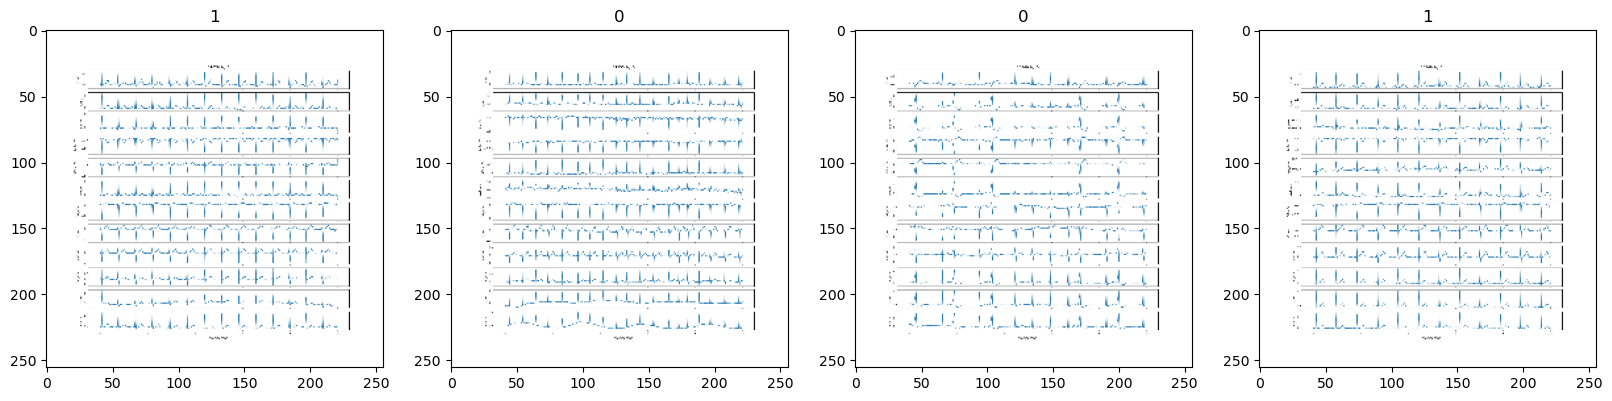

In [7]:
fig, ax = plt.subplots(ncols =4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [8]:
scaled = batch[0] /255


In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [11]:
train_size = int(len(data)*.4)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [12]:
train_size

12

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()


In [17]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [18]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [20]:
logdir='logs'


In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [22]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


12/12 [==============================] - 24s 2s/step - loss: 0.8818 - accuracy: 0.5026 - val_loss: 0.6939 - val_accuracy: 0.4531
Epoch 2/20
12/12 [==============================] - 17s 1s/step - loss: 0.6947 - accuracy: 0.4818 - val_loss: 0.6904 - val_accuracy: 0.5625
Epoch 3/20
12/12 [==============================] - 16s 1s/step - loss: 0.6912 - accuracy: 0.5547 - val_loss: 0.6874 - val_accuracy: 0.6927
Epoch 4/20
12/12 [==============================] - 15s 1s/step - loss: 0.6854 - accuracy: 0.5729 - val_loss: 0.6718 - val_accuracy: 0.6823
Epoch 5/20
12/12 [==============================] - 14s 1s/step - loss: 0.6816 - accuracy: 0.6042 - val_loss: 0.6838 - val_accuracy: 0.6771
Epoch 6/20
12/12 [==============================] - 14s 1s/step - loss: 0.6822 - accuracy: 0.5703 - val_loss: 0.6761 - val_accuracy: 0.6667
Epoch 7/20
12/12 [==============================] - 14s 1s/step - loss: 0.6704 - accuracy: 0.6432 - val_loss: 0.6625 - val_accuracy: 0.6458
Epoch 8/20
12/12 [

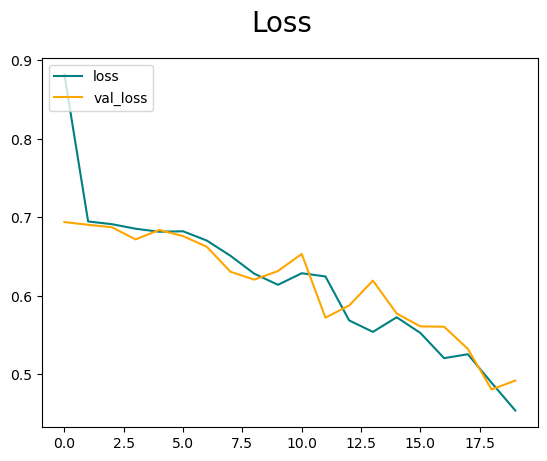

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


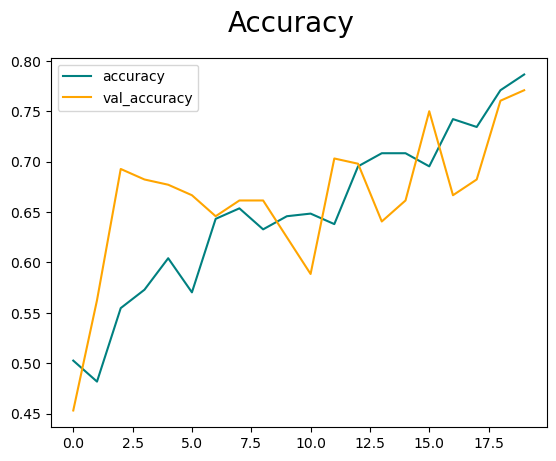

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 133ms/step


In [28]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.72727275, shape=(), dtype=float32) tf.Tensor(0.6956522, shape=(), dtype=float32) tf.Tensor(0.7291667, shape=(), dtype=float32)


In [29]:
import cv2

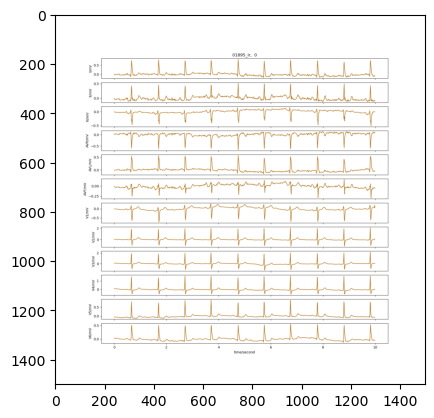

In [64]:
image_path = 'test_images/test_abnorm/01895_lr.png'
image_loaded = tf.keras.utils.load_img(image_path)
# Printing the obtained image.
image_loaded

img = cv2.imread(image_path)
plt.imshow(img)
plt.show()


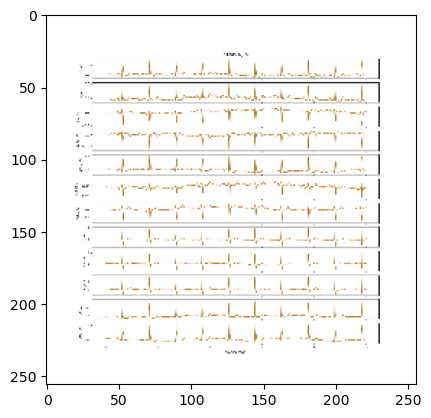

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [67]:
if yhat > 0.5: 
    print(f'Predicted class is norm')
else:
    print(f'Predicted class is abnorm')

Predicted class is norm
